# SPRM Demo
### v2.0.3 December 24, 2025

## Setup
### Before running this notebook,
### 1. From the main folder install SPRM
```bash install_sprm.sh```
### 2. Change to the demo folder and download the demo files (from https://drive.google.com/drive/folders/1denyZ1SFoWpWrPO9UbSdcF2DvHEv6ovN)
```cd demo
bash downloaddemofiles.sh```

## Run SPRM

You'll be running a sample image and mask 

Est. Runtime: ~15 minutes.  Est. Disk space required: 600 MB

In [17]:
!sh run_sprm.sh

-e [INFO] SPRM Demo Runner
-e [INFO] ================
-e [INFO] Creating output directory...
-e [INFO] Checking for demo files...
-e [SUCCESS] Demo files found in img/ and mask/ directories
-e [INFO] Detecting and activating SPRM environment...
-e [INFO] Found SPRM conda environment. Activating...
-e [SUCCESS] Activated conda environment 'SPRM'
-e [INFO] Verifying SPRM installation...
-e [SUCCESS] SPRM import successful
-e [INFO] Running SPRM demo...
-e [INFO] Command: MPLBACKEND=Agg python -u ../SPRM.py --img-dir img/image_demo.tiff --mask-dir mask/mask_demo.tiff --output-dir sprm_demo_outputs --processes 1
-e [SUCCESS] SPRM demo completed successfully!
-e [INFO] Results saved to: sprm_demo_outputs/
-e [INFO] Log file: sprm_demo_outputs/sprm_demo_outputs.log


## Display SPRM Results

In [18]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import IFrame
import pandas as pd
#import matplotlib
#%matplotlib inline
def dispclustersandlegend(png,csv=None):
    image = Image.open(png+".png")
    plt.figure()
    plt.imshow(image)
    plt.title(png)
    plt.axis('off')
    plt.show()
    if csv is not None:
        legend = pd.read_csv(csv+".csv")
        print(legend)

In [19]:
# if using your own image (i.e., modifying the file name or output path in run_sprm.sh), change these to match
folder_path = "sprm_demo_outputs/"
input_file = folder_path+"image_demo.tiff"

## Show image quality metrics

In [20]:
import json
with open(input_file + "-SPRM_Image_Quality_Measures.json", "r") as f:
    jsoncontent = json.load(f)
print(json.dumps(jsoncontent,indent=2))

{
  "Image Information": {
    "Number of Channels": 4
  },
  "Image Quality Metrics not requiring image segmentation": {
    "Signal To Noise Otsu": {
      "Channel:0:0": 19257.31181900598,
      "Channel:0:1": 3.360641913091957,
      "Channel:0:2": 6.4885938357167685,
      "Channel:0:3": 2.8764381165512343
    },
    "Signal To Noise Z-Score": {
      "Channel:0:0": 0.0121527881109482,
      "Channel:0:1": 1.329795119169208,
      "Channel:0:2": 0.8293747384631748,
      "Channel:0:3": 1.531820336997702
    },
    "Total Intensity": {
      "Channel:0:0": 1461060.0,
      "Channel:0:1": 6744158.0,
      "Channel:0:2": 6086252.5,
      "Channel:0:3": 14275353.0
    }
  },
  "Image Quality Metrics requiring background segmentation": {
    "1/AvgCVBackground": 0.039340822971094286,
    "Fraction of Pixels in Image Background": 0.15112531643550237,
    "FractionOfFirstPCBackground": 0.5394821763038635
  },
  "Image Quality Metrics that require cell segmentation": {
    "Channel Statis

## Pixels colored by the first three principal components of the pixel intensities 
### Table below shows the channels most distinguishing the clusters and their weightings

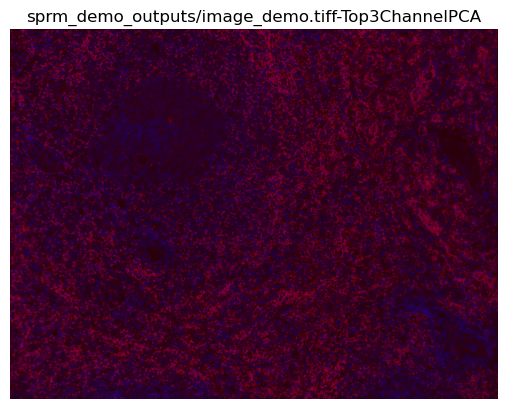

   PCA #  Channel:0:0  Channel:0:1  Channel:0:2  Channel:0:3  \
0      1     0.006716     0.670741     0.678208     0.300158   
1      2     0.999932     0.002000     0.003013     0.011095   
2      3     0.009539     0.240318     0.184201     0.953009   

   Explained Variance  
0            0.493977  
1            0.249968  
2            0.226183  


In [21]:
dispclustersandlegend(input_file+"-Top3ChannelPCA",input_file+"-channelPCA_summary")

## Cell Adjancy Graph shows lines between cells that are within shown distance (in pixels) of each other

In [22]:
import base64
with open(input_file + "_AdjacencyGraph.pdf", "rb") as pdf:
    content = pdf.read()
# encode PDF
base64_pdf = base64.b64encode(content).decode("utf-8")
# display encoded PDF
IFrame(f"data:application/pdf;base64,{base64_pdf}", width=600, height=400)

## Cells colored by cell cluster after clustering using UMAP embedding of all features

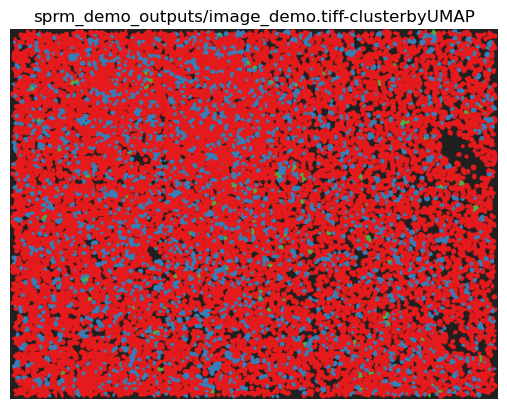

In [23]:
dispclustersandlegend(input_file+"-clusterbyUMAP")

## Cells colored by cell cluster using different feature sets of whole cells
### Tables below each image show the channels most distinguishing the clusters and their average feature value for each cluster (covariance features are correlations between two channels)

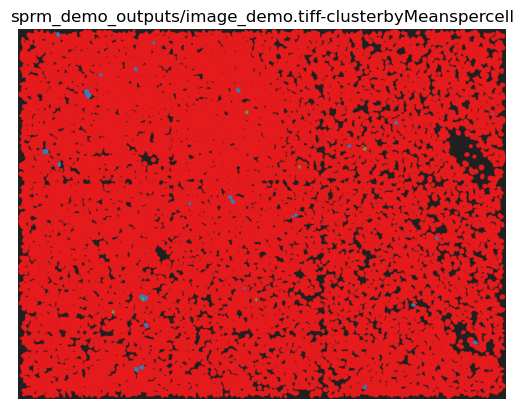

   ID  Channel:0:3  Channel:0:2  Channel:0:1
0   1     1.971742     0.703345     0.820566
1   2     2.273540     0.434463     0.605427
2   3     2.751462     0.534464     0.637799


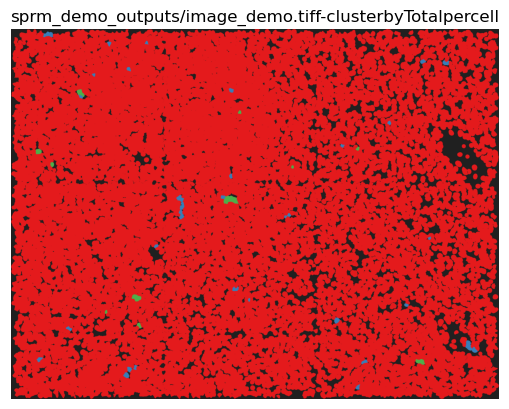

   ID  Channel:0:3  Channel:0:2  Channel:0:1
0   1  1121.999211   433.279358   489.133201
1   2  2210.547634   379.934279   550.773677
2   3  1422.418333   324.832090   418.479573


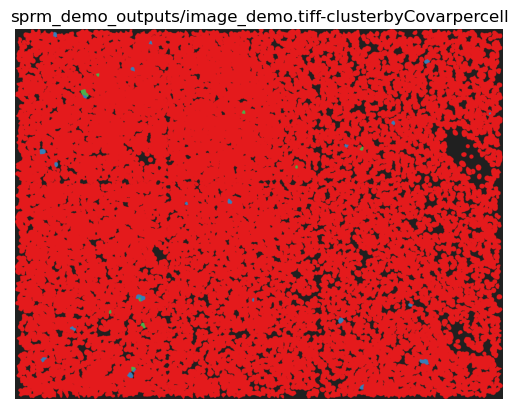

   ID  Channel:0:3:Channel:0:3  Channel:0:0:Channel:0:2  \
0   1                 1.073581                -0.005035   
1   2                 2.046301                 0.261740   
2   3                 1.976753                -2.651659   

   Channel:0:2:Channel:0:3  
0                -0.180972  
1                -0.043862  
2                -0.016994  


In [24]:
dispclustersandlegend(input_file+"-clusterbyMeanspercell",input_file+"-clustercell_mean_legend")
dispclustersandlegend(input_file+"-clusterbyTotalpercell",input_file+"-clustercell_total_legend")
dispclustersandlegend(input_file+"-clusterbyCovarpercell",input_file+"-clustercell_covariance_legend")

## Cells colored by cell cluster using different feature sets of nuclei
### Tables below each image show the channels most distinguishing the clusters and their average feature value for each cluster (covariance features are correlations between two channels)

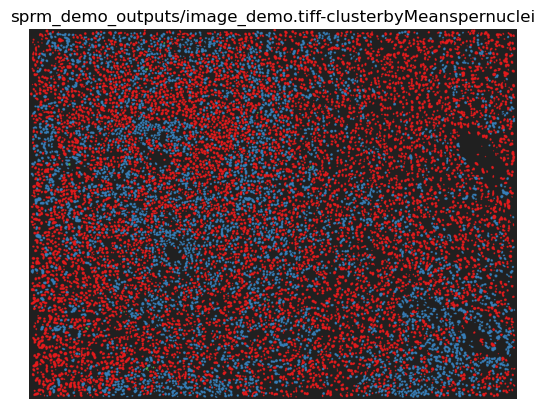

   ID  Channel:0:3  Channel:0:2  Channel:0:1
0   1     3.793950     0.386451     0.647238
1   2     3.957192     0.506663     0.622506
2   3     2.543938     0.507032     0.682852


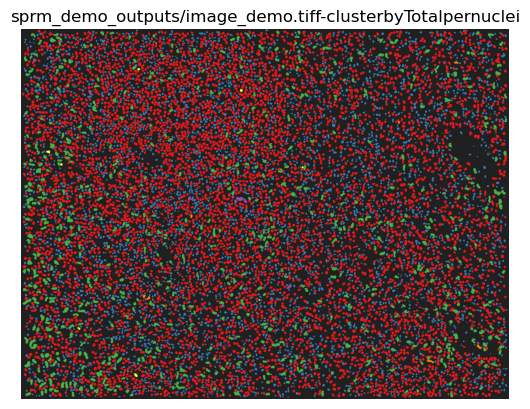

   ID  Channel:0:3  Channel:0:2  Channel:0:1
0   1   811.996622   112.712614   170.879892
1   2  1195.056393   114.191974   183.258609
2   3   333.220014    62.205687    86.683200
3   4   986.436501    89.715334   146.124623
4   5  1643.553788   300.187275   357.924537
5   6   975.012712    92.329031   135.608424
6   7   875.651978    90.625626   141.413666


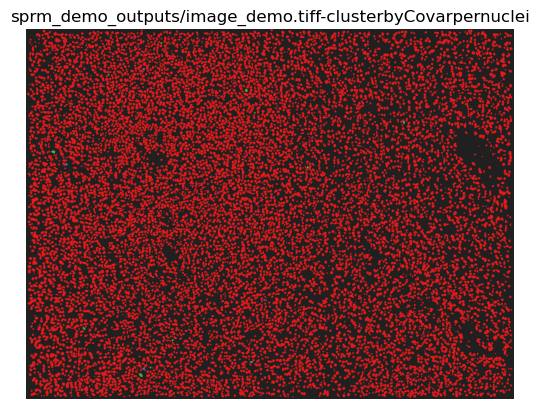

   ID  Channel:0:3:Channel:0:3  Channel:0:0:Channel:0:2  \
0   1                 0.455700                 0.000435   
1   2                 1.331354                -1.860380   
2   3                 1.289009                 2.775541   
3   4                 1.812106                10.892210   

   Channel:0:2:Channel:0:3  
0                -0.040217  
1                 0.033015  
2                 0.000852  
3                 0.023504  


In [25]:
dispclustersandlegend(input_file+"-clusterbyMeanspernuclei",input_file+"-clusternuclei_mean_legend")
dispclustersandlegend(input_file+"-clusterbyTotalpernuclei",input_file+"-clusternuclei_total_legend")
dispclustersandlegend(input_file+"-clusterbyCovarpernuclei",input_file+"-clusternuclei_covariance_legend")

## Cells colored by cell cluster using cell shape+size or normalized shape

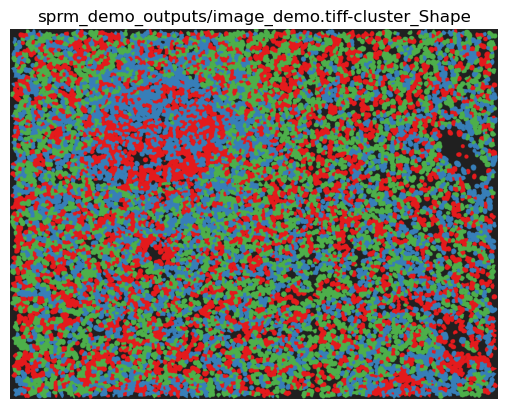

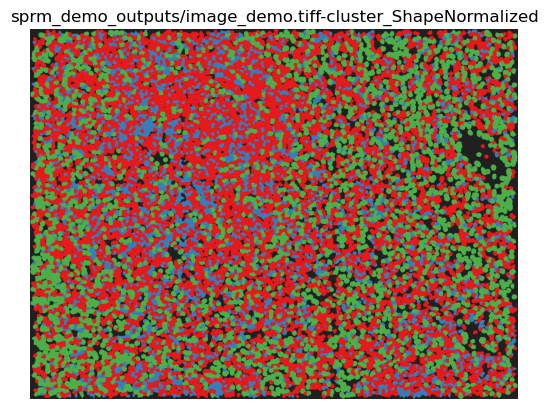

In [26]:
dispclustersandlegend(input_file+"-cluster_Shape")
dispclustersandlegend(input_file+"-cluster_ShapeNormalized")

## The cell centers, cell features (in separate files by feature type), and the cluster assignments for each cell (only for those not ignored because it was too small or touching the image edge) are contained in CSV files
### The first 5 rows of each CSV are shown

In [27]:
import pandas as pd
cellcenters = pd.read_csv(input_file + "-cell_centers.csv")
cellcenters.head()

ID  x     y  z
0   0  0     0  0
1   1  4  2096  0
2   2  5  2643  0
3   3  5  1520  0
4   4  6  1292  0

In [28]:
cellchannelmean = pd.read_csv(input_file + "-cell_channel_mean.csv")
cellchannelmean.head()

ID  Channel:0:0  Channel:0:1  Channel:0:2  Channel:0:3
0  19          0.0     1.426337     1.339412     1.960549
1  31          0.0     1.383243     1.637587     1.454641
2  49          0.0     0.659794     0.528512     2.783415
3  52          0.0     1.287008     1.533587     1.975893
4  69          0.0     0.361444     0.264212     1.558617

In [29]:
cellclusters = pd.read_csv(input_file + "-cell_cluster.csv")
cellclusters.head()

ID  K-Means [Texture]  K-Means [Mean] Expression  \
0  19                  1                          1   
1  31                  1                          1   
2  49                  1                          1   
3  52                  1                          1   
4  69                  1                          1   

   K-Means [Covariance] Expression  K-Means [Total] Expression  \
0                                1                           1   
1                                1                           1   
2                                1                           1   
3                                1                           1   
4                                1                           1   

   K-Means [Mean-All-SubRegions] Expression  K-Means [tSNE_All_Features]  \
0                                         1                            3   
1                                         1                            3   
2                                         1                            2   
3                                         1                            1   
4                                         1                            1   

   K-Means [UMAP_All_Features]  K-Means [Shape-Vectors]  \
0                            3                        2   
1                            3                        1   
2                            2                        2   
3                            3                        2   
4                            1                        1   

   K-Means [Shape-Vectors Normalized]  
0                                   1  
1                                   1  
2                                   2  
3                                   2  
4                                   1